In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
mouse_metadata = pd.read_csv(r"C:\Users\juank\OneDrive\Desktop\Everything\UofT\Module_5\Module_5_Challenge\Starter_Code (3)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv")
study_results = pd.read_csv(r"C:\Users\juank\OneDrive\Desktop\Everything\UofT\Module_5\Module_5_Challenge\Starter_Code (3)\Starter_Code\Pymaceuticals\data\Study_results.csv")

In [3]:
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

In [4]:
unique_mice = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {unique_mice}")

Number of unique mice IDs: 249


In [5]:
duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']
print("Mouse ID(s) with duplicate time points:")
print(duplicated_mice)

Mouse ID(s) with duplicate time points:
909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [6]:
duplicated_data = merged_data[merged_data['Mouse ID'].isin(duplicated_mice)]
print("Data associated with duplicated mouse ID(s):")
print(duplicated_data)

Data associated with duplicated mouse ID(s):
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Pr

In [7]:
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicated_mice)]

In [8]:
updated_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f"Updated number of unique mice IDs: {updated_unique_mice}")

Updated number of unique mice IDs: 248


In [9]:
grouped_data = cleaned_data.groupby('Drug Regimen')

In [11]:
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

In [12]:
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance',
                                              'std': 'Standard Deviation', 'sem': 'SEM'})

In [13]:
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [14]:
bar_data = grouped_data['Mouse ID'].count()

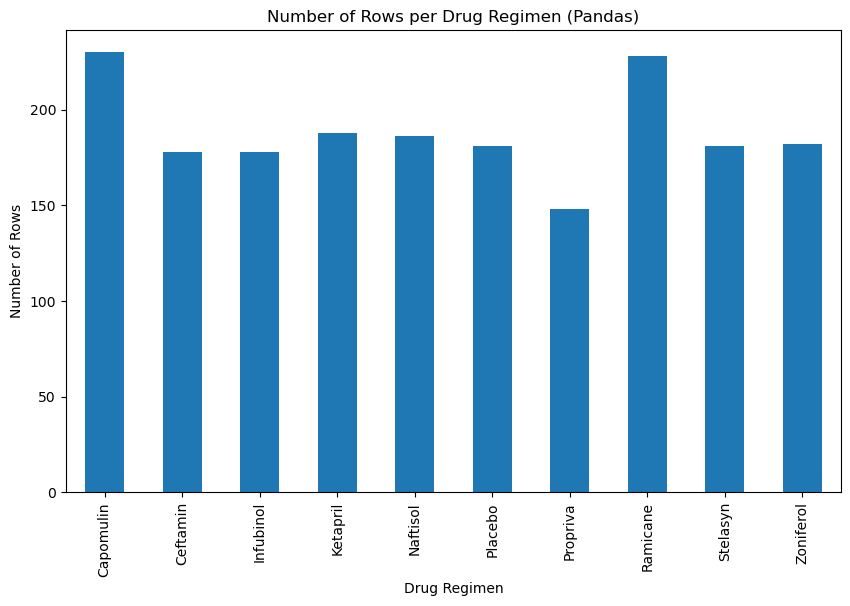

In [15]:
bar_data.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Number of Rows per Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

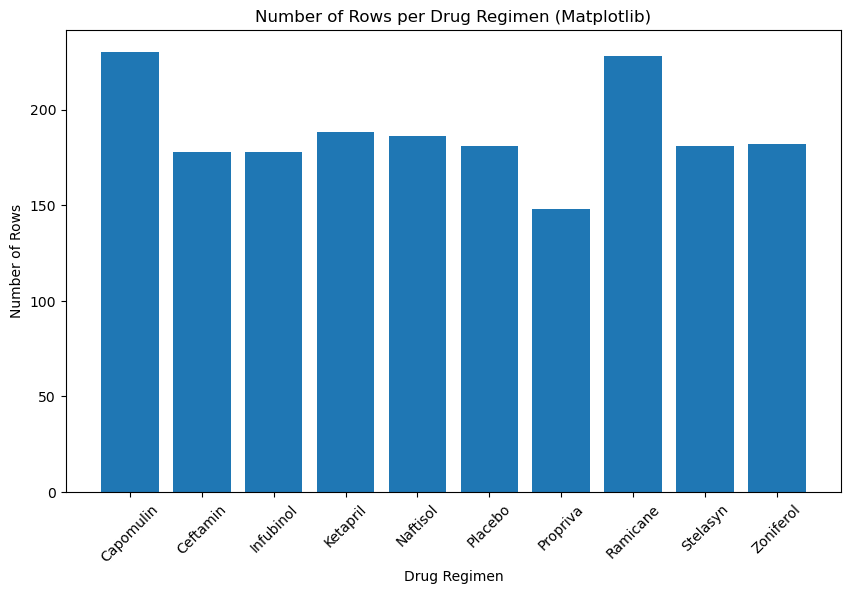

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(bar_data.index, bar_data.values)
plt.title('Number of Rows per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

In [17]:
pie_data = cleaned_data['Sex'].value_counts()

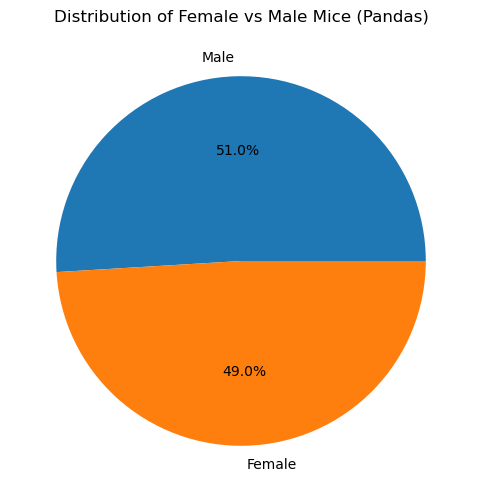

In [18]:
pie_data.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribution of Female vs Male Mice (Pandas)')
plt.ylabel('')
plt.show()

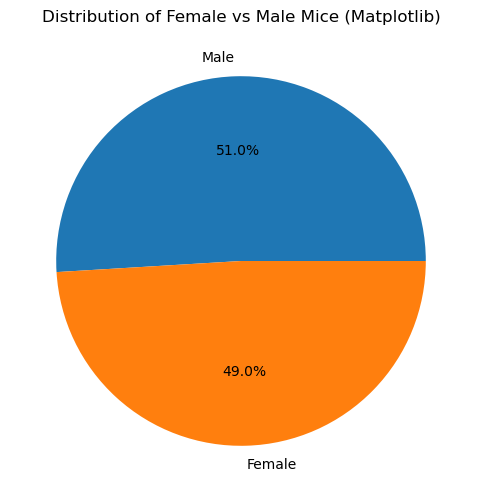

In [19]:
plt.figure(figsize=(6, 6))
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice (Matplotlib)')
plt.show()

In [20]:
grouped_max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume = pd.merge(grouped_max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

In [21]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

In [22]:
for treatment in treatments:
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume)

In [23]:
outliers = []
for i, treatment in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    treatment_outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    outliers.append(treatment_outliers)
    print(f"Outliers for {treatment}: {treatment_outliers}")

Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


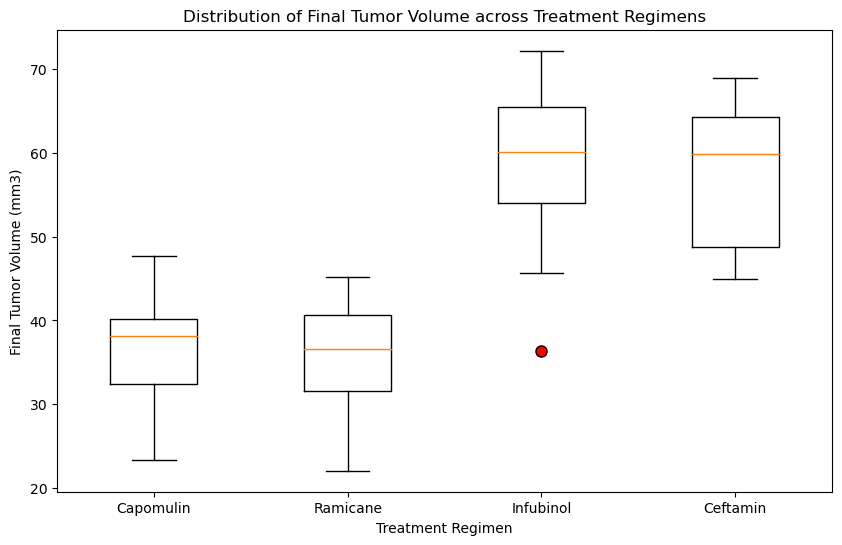

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Distribution of Final Tumor Volume across Treatment Regimens')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [25]:
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

In [26]:
selected_mouse = capomulin_data[capomulin_data['Mouse ID'] == 's185']
tumor_volume = selected_mouse['Tumor Volume (mm3)']
time_points = selected_mouse['Timepoint']

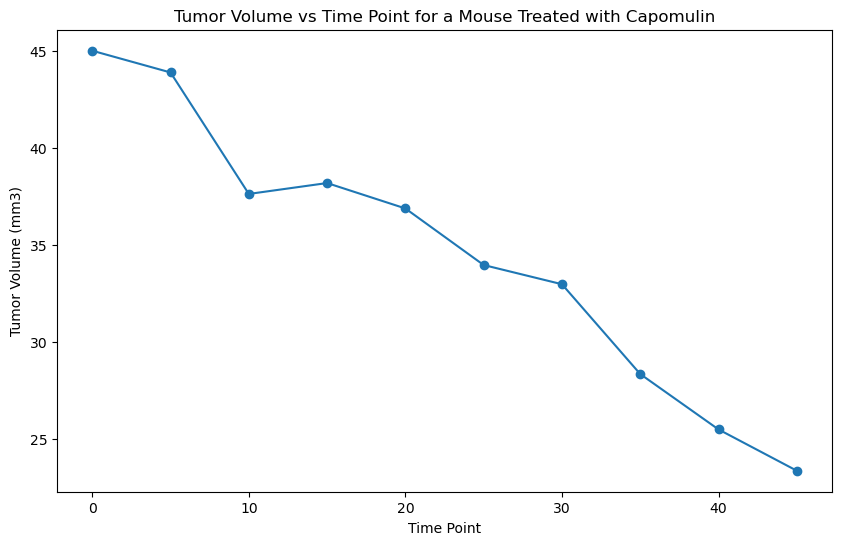

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, tumor_volume, marker='o')
plt.title('Tumor Volume vs Time Point for a Mouse Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [28]:
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

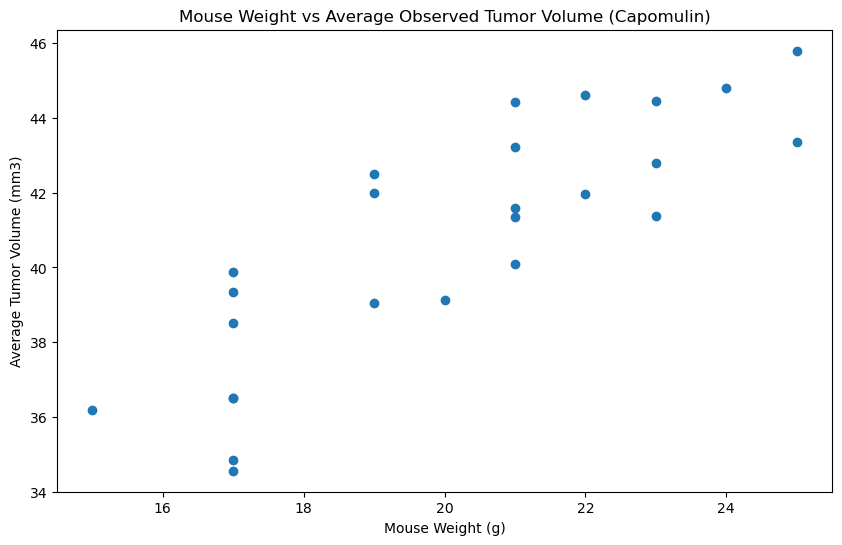

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume)
plt.title('Mouse Weight vs Average Observed Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [30]:
correlation_coefficient = mouse_weight.corr(average_tumor_volume)
print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.8419363424694722


In [31]:
from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, average_tumor_volume)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {rvalue}")
print(f"P-value: {pvalue}")
print(f"Standard error: {stderr}")

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-value: 0.8419363424694721
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


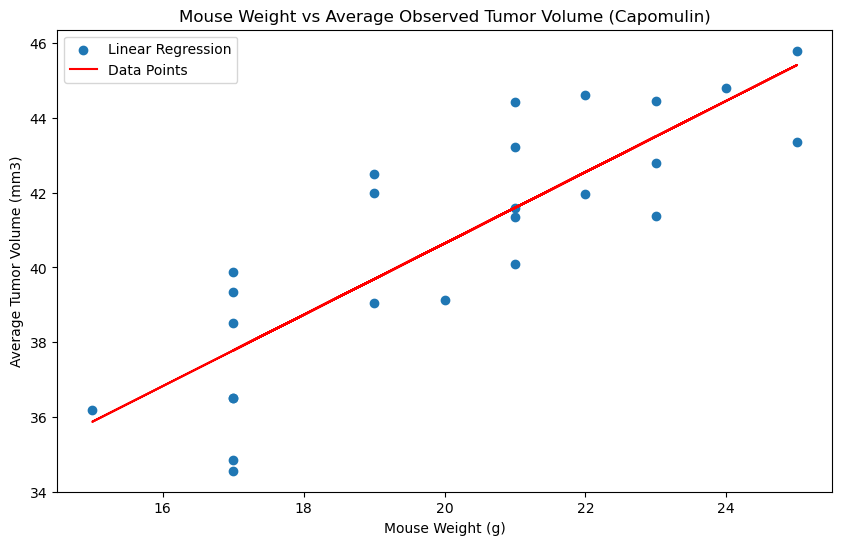

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')
plt.title('Mouse Weight vs Average Observed Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend(['Linear Regression', 'Data Points'])
plt.show()